In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [86]:
df = pd.read_csv("netflix1.csv")

In [87]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [88]:
df.shape

(8790, 10)

Dropping the column

In [89]:

df.drop(['director','date_added','show_id','duration'],axis=1,inplace=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   country       8790 non-null   object
 3   release_year  8790 non-null   int64 
 4   rating        8790 non-null   object
 5   listed_in     8790 non-null   object
dtypes: int64(1), object(5)
memory usage: 412.2+ KB


In [91]:
df.duplicated().sum()

3

In [92]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [93]:
df.isnull().sum()

type            0
title           0
country         0
release_year    0
rating          0
listed_in       0
dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   country       8790 non-null   object
 3   release_year  8790 non-null   int64 
 4   rating        8790 non-null   object
 5   listed_in     8790 non-null   object
dtypes: int64(1), object(5)
memory usage: 412.2+ KB


In [95]:
df.nunique()

type               2
title           8787
country           86
release_year      74
rating            14
listed_in        513
dtype: int64

 I split listed_in into a list and then explode dataframe to have only one listed_in per row for each movie and Tv show

In [96]:
df['listed_in'] = df["listed_in"].str.split(', ')
df = df.explode("listed_in").reset_index(drop=True)
df.head()

,type,title,country,release_year,rating,listed_in
0,Movie,Dick Johnson Is Dead,United States,2020,PG-13,Documentaries
1,TV Show,Ganglands,France,2021,TV-MA,Crime TV Shows
2,TV Show,Ganglands,France,2021,TV-MA,International TV Shows
3,TV Show,Ganglands,France,2021,TV-MA,TV Action & Adventure
4,TV Show,Midnight Mass,United States,2021,TV-MA,TV Dramas


most frequent listed_in of movies and tvshows released on Netflix

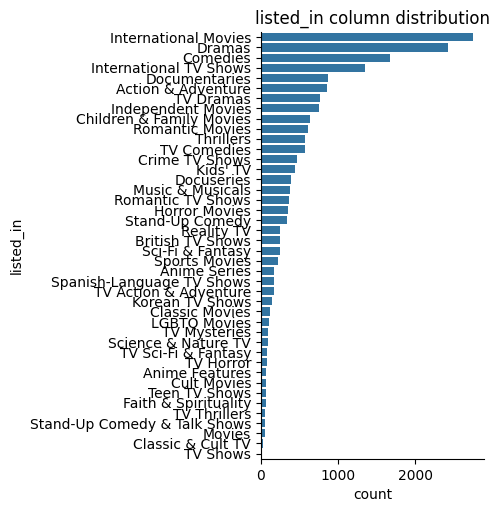

In [97]:
sns.catplot(y = 'listed_in',data =df ,kind='count',
            order = df['listed_in'].value_counts().index)
plt.title('listed_in column distribution')

plt.show()
                                                                                       

calcualt the movies and tv shows number

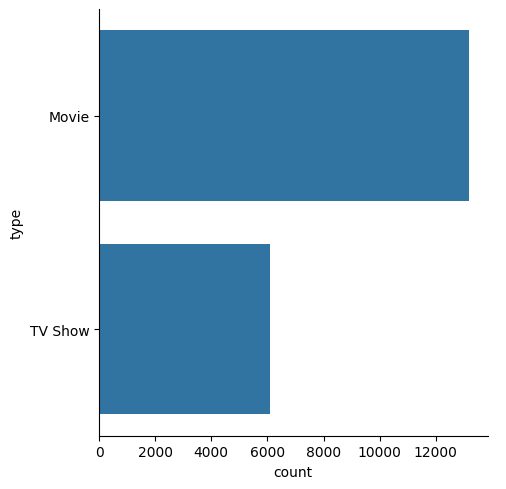

In [98]:
sns.catplot(y = 'type',data =df ,kind='count',
            order = df['type'].value_counts().index)

plt.show()
                                                   

highest ratings in rating column

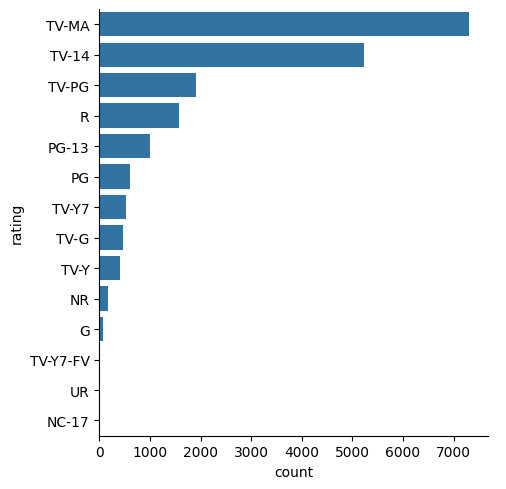

In [99]:
sns.catplot(y = 'rating',data =df ,kind='count',
            order = df['rating'].value_counts().index)

plt.show()

which year has the most filmmed movies and tvshows

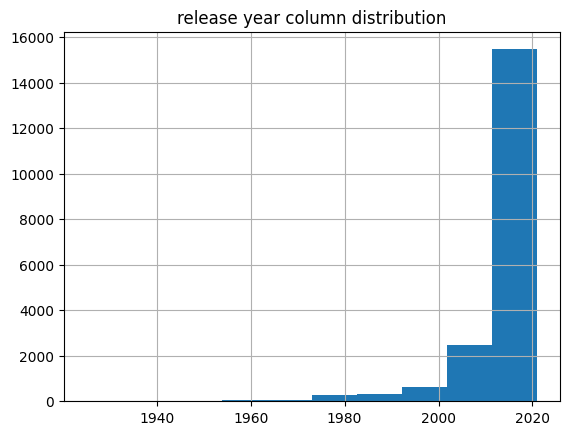

In [100]:
df['release_year'].hist()
plt.title('release year column distribution')
plt.show()